**Elgamal**

a = 19600247
p = 10000000000000000051
alpha = 2
k = 169427
x = 1284457829706343127

In [ ]:
a = 19600247
p = 10000000000000000051
alpha = 2
k = 169427
x = 1284457829706343127

# Tính lại beta, y1, y2
beta = mod_exp(alpha, a, p)
y1 = mod_exp(alpha, k, p)
y2 = (x % p * mod_exp(beta, k, p)) % p
print(f"beta:{beta}")
print(f"y1:{y1}")
print(f"y2:{y2}")
print(f"x:{(y2*mod_exp(y1,p-a-1,p))%p}")
s = mod_exp(y1, a, p)          # s = y1^a mod p  (== beta^k)
inv_s = modinv(s, p)           # nghịch đảo bằng extended euclid
if inv_s is None:
    print("Không tồn tại nghịch đảo: gcd(s, p) != 1")
else:
    recovered = (y2 * inv_s) % p
    print("recovered:", recovered, "== x ?", recovered == x)

NameError: name 'mod_exp' is not defined

**Đường cong eliptic**

Số điểm trên đường cong: 809
Các điểm: [(1, 29), (1, 798), (2, 175), (2, 652), (4, 276), (4, 551), (8, 154), (8, 673), (9, 170), (9, 657), (13, 316), (13, 511), (14, 120), (14, 707), (16, 7), (16, 820), (17, 182), (17, 645), (20, 271), (20, 556), (21, 101), (21, 726), (23, 377), (23, 450), (27, 351), (27, 476), (28, 167), (28, 660), (29, 353), (29, 474), (30, 39), (30, 788), (33, 395), (33, 432), (34, 260), (34, 567), (39, 351), (39, 476), (40, 23), (40, 804), (41, 321), (41, 506), (50, 272), (50, 555), (52, 212), (52, 615), (56, 335), (56, 492), (59, 308), (59, 519), (60, 266), (60, 561), (61, 359), (61, 468), (63, 316), (63, 511), (67, 365), (67, 462), (71, 314), (71, 513), (72, 172), (72, 655), (74, 382), (74, 445), (76, 409), (76, 418), (77, 317), (77, 510), (81, 191), (81, 636), (84, 59), (84, 768), (88, 151), (88, 676), (90, 182), (90, 645), (95, 206), (95, 621), (99, 329), (99, 498), (100, 271), (100, 556), (101, 382), (101, 445), (102, 103), (102, 724), (104, 207), (104, 620), 

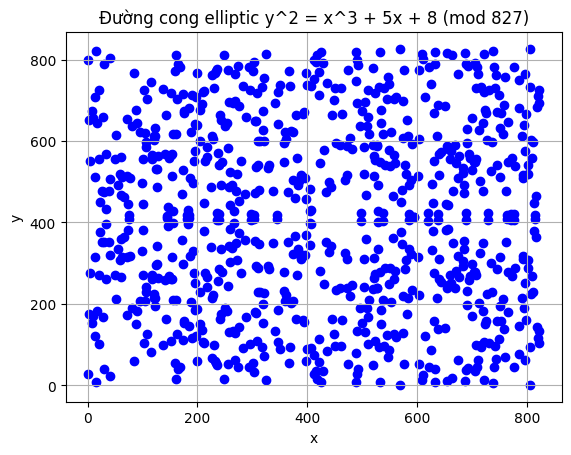

In [6]:
import matplotlib.pyplot as plt
from util import is_prime

flag = False
for i in range (5,1000):
    if flag == True:
        break
    for j in range (1,1000):
            # -------- 1. Chọn trường và thông số đường cong --------
        p = 827   # số nguyên tố (trường hữu hạn F_p)
        a = i
        b = j

        # Kiểm tra đường cong không suy biến: 4a^3 + 27b^2 != 0 mod p
        if (4*a**3 + 27*b**2) % p == 0:
            continue

        # -------- 2. Tìm tất cả các điểm trên EC --------
        points = []

        for x in range(p):
            rhs = (x**3 + a*x + b) % p  # y^2 = x^3 + ax + b (mod p)
            for y in range(p):
                if (y*y) % p == rhs:
                    points.append((x, y))

        # Thêm điểm vô cực (O)
        points.append(("O", "O"))
        flag = is_prime(len(points))
        if flag == True:
            print(f"Số điểm trên đường cong: {len(points)}")
            print("Các điểm:", points)
            # -------- 3. Vẽ đường cong (chỉ với trường nhỏ để minh họa) --------
            x_vals = [pt[0] for pt in points if pt[0] != "O"]
            y_vals = [pt[1] for pt in points if pt[1] != "O"]

            plt.scatter(x_vals, y_vals, color='blue')
            plt.title(f"Đường cong elliptic y^2 = x^3 + {a}x + {b} (mod {p})")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid(True)
            plt.show()
            break



